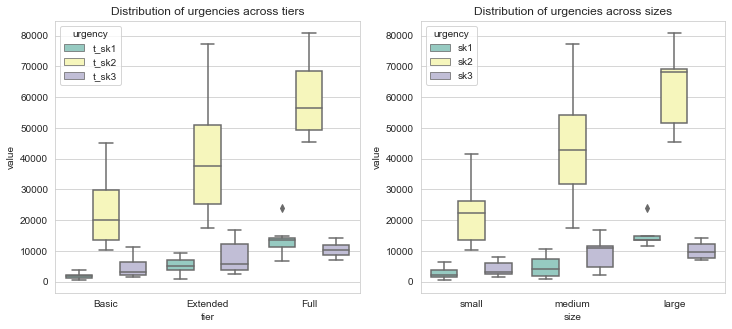

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/dgina23_hospital_sizes.csv')

d = df[['tier', 't_sk1', 't_sk2', 't_sk3']]
d2 = df[['size', 'sk1', 'sk2', 'sk3']]

# reshape the d dataframe suitable for statsmodels package
d_melt = pd.melt(d, id_vars=['tier'], value_vars=['t_sk1', 't_sk2', 't_sk3'])
d_melt = d_melt.dropna(subset=['value'])
d_melt.columns = ['tier', 'urgency', 'value']

d2_melt = pd.melt(d2, id_vars=['size'], value_vars=['sk1', 'sk2', 'sk3'])
d2_melt = d2_melt.dropna(subset=['value'])
d2_melt.columns = ['size', 'urgency', 'value']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="tier", y="value", hue="urgency", data=d_melt, palette="Set3", ax=axes[0])
sns.boxplot(x="size", y="value", hue="urgency", data=d2_melt, palette="Set3", ax=axes[1])

axes[0].set_title("Distribution of urgencies across tiers")
axes[1].set_title("Distribution of urgencies across sizes")

plt.show();

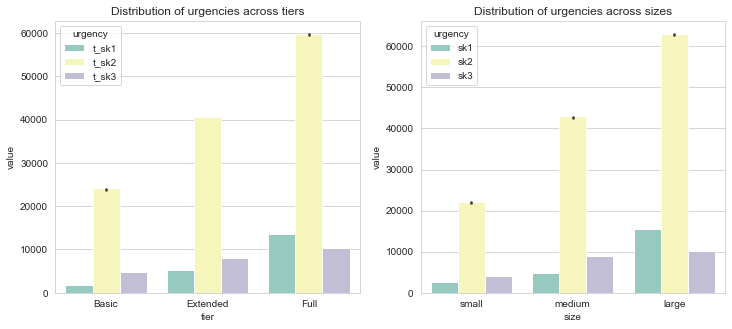

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x="tier", y="value", hue="urgency", data=d_melt, palette="Set3", ax=axes[0], ci=True)
sns.barplot(x="size", y="value", hue="urgency", data=d2_melt, palette="Set3", ax=axes[1], ci=True)

axes[0].set_title("Distribution of urgencies across tiers")
axes[1].set_title("Distribution of urgencies across sizes")

# Display the plot
plt.show();

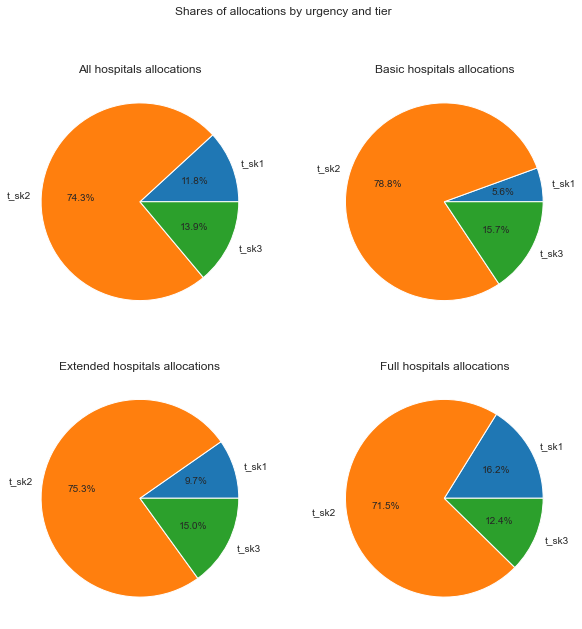

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Shares of allocations by urgency and tier')

sums['all'] = df[['t_sk1', 't_sk2', 't_sk3']].sum()
sums['basic'] = df.loc[df['tier'] == 'Basic', ['t_sk1', 't_sk2', 't_sk3']].sum()
sums['extended'] = df.loc[df['tier'] == 'Extended', ['t_sk1', 't_sk2', 't_sk3']].sum()
sums['full'] = df.loc[df['tier'] == 'Full', ['t_sk1', 't_sk2', 't_sk3']].sum()

sums['all'].plot(kind='pie', ax=axes[0,0], title="All hospitals allocations", label="", autopct='%0.1f%%')
sums['basic'].plot(kind='pie', ax=axes[0,1], title="Basic hospitals allocations", label="", autopct='%0.1f%%')
sums['extended'].plot(kind='pie', ax=axes[1,0], title="Extended hospitals allocations", label="", autopct='%0.1f%%')
sums['full'].plot(kind='pie', ax=axes[1,1], title="Full hospitals allocations", label="", autopct='%0.1f%%')

# Display the plot
plt.show();

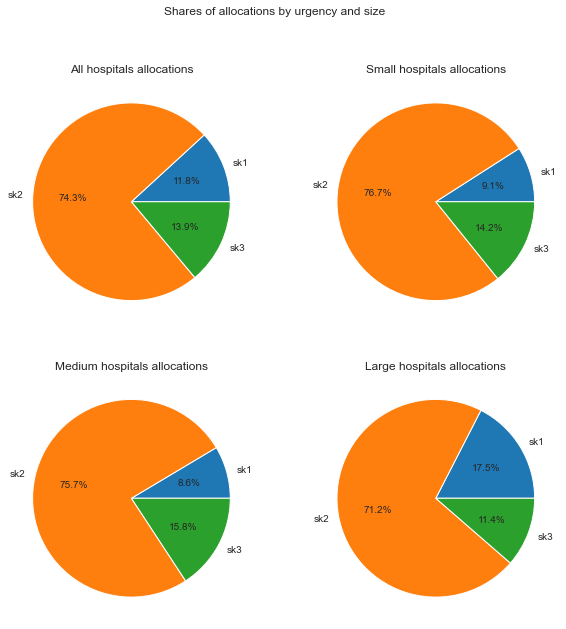

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Shares of allocations by urgency and size')

sums['total'] = df[['sk1', 'sk2', 'sk3']].sum()
sums['small'] = df.loc[df['size'] == 'small', ['sk1', 'sk2', 'sk3']].sum()
sums['medium'] = df.loc[df['size'] == 'medium', ['sk1', 'sk2', 'sk3']].sum()
sums['large'] = df.loc[df['size'] == 'large', ['sk1', 'sk2', 'sk3']].sum()

sums['total'].plot(kind='pie', ax=axes[0,0], title="All hospitals allocations", label="", autopct='%0.1f%%')
sums['small'].plot(kind='pie', ax=axes[0,1], title="Small hospitals allocations", label="", autopct='%0.1f%%')
sums['medium'].plot(kind='pie', ax=axes[1,0], title="Medium hospitals allocations", label="", autopct='%0.1f%%')
sums['large'].plot(kind='pie', ax=axes[1,1], title="Large hospitals allocations", label="", autopct='%0.1f%%')

# Display the plot
plt.show();

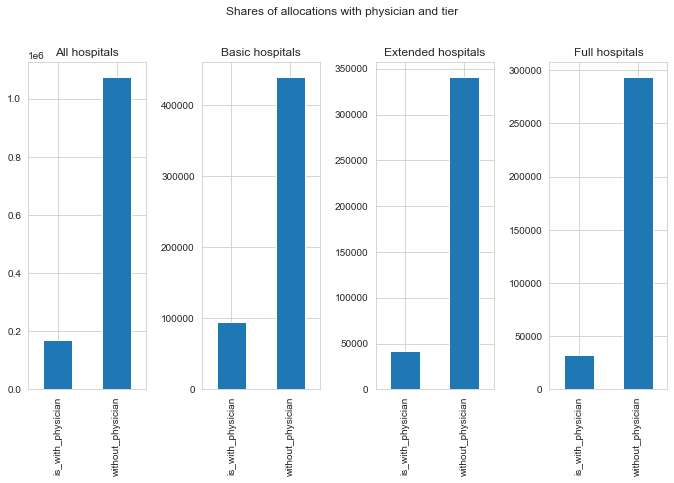

In [146]:
fig, axes = plt.subplots(1, 4, figsize=(10, 6))
fig.suptitle('Shares of allocations with physician and tier')
fig.tight_layout(pad=2.5)

sums['secondary_deployment'] = df[['secondary_deployment', 'without_secondary_deployment']].sum()
sums['basic'] = df.loc[df['tier'] == 'Basic', ['secondary_deployment', 'without_secondary_deployment']].sum()
sums['extended'] = df.loc[df['tier'] == 'Extended', ['secondary_deployment', 'without_secondary_deployment']].sum()
sums['full'] = df.loc[df['tier'] == 'Full', ['secondary_deployment', 'without_secondary_deployment']].sum()

sums['with_physician'] = df[['is_with_physician', 'without_physician']].sum()
sums['basic'] = df.loc[df['tier'] == 'Basic', ['is_with_physician', 'without_physician']].sum()
sums['extended'] = df.loc[df['tier'] == 'Extended', ['is_with_physician', 'without_physician']].sum()
sums['full'] = df.loc[df['tier'] == 'Full', ['is_with_physician', 'without_physician']].sum()

sums['with_physician'].plot(kind='bar', ax=axes[0], title="All hospitals")
sums['basic'].plot(kind='bar', ax=axes[1], title="Basic hospitals")
sums['extended'].plot(kind='bar', ax=axes[2], title="Extended hospitals")
sums['full'].plot(kind='bar', ax=axes[3], title="Full hospitals")

# Display the plot
plt.show();

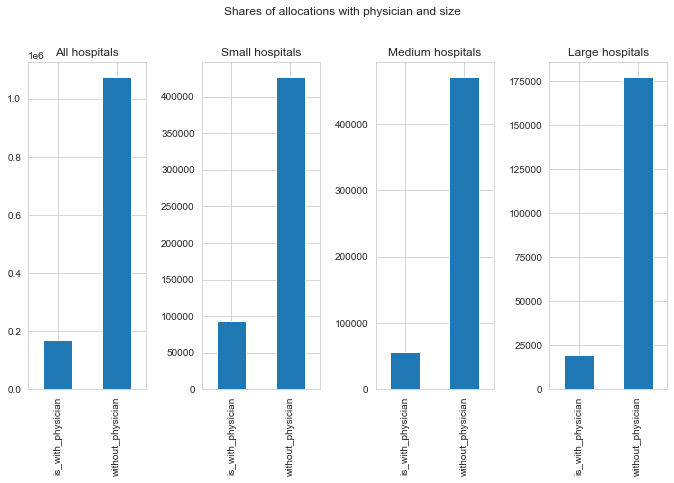

In [147]:
fig, axes = plt.subplots(1, 4, figsize=(10, 6))
fig.suptitle('Shares of allocations with physician and size')
fig.tight_layout(pad=2.5)

sums['secondary_deployment'] = df[['secondary_deployment', 'without_secondary_deployment']].sum()
sums['small'] = df.loc[df['size'] == 'small', ['secondary_deployment', 'without_secondary_deployment']].sum()
sums['medium'] = df.loc[df['size'] == 'medium', ['secondary_deployment', 'without_secondary_deployment']].sum()
sums['large'] = df.loc[df['size'] == 'large', ['secondary_deployment', 'without_secondary_deployment']].sum()

sums['with_physician'] = df[['is_with_physician', 'without_physician']].sum()
sums['small'] = df.loc[df['size'] == 'small', ['is_with_physician', 'without_physician']].sum()
sums['medium'] = df.loc[df['size'] == 'medium', ['is_with_physician', 'without_physician']].sum()
sums['large'] = df.loc[df['size'] == 'large', ['is_with_physician', 'without_physician']].sum()

sums['with_physician'].plot(kind='bar', ax=axes[0], title="All hospitals")
sums['small'].plot(kind='bar', ax=axes[1], title="Small hospitals")
sums['medium'].plot(kind='bar', ax=axes[2], title="Medium hospitals")
sums['large'].plot(kind='bar', ax=axes[3], title="Large hospitals")

# Display the plot
plt.show();